In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#loading data from other folder
data=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads (1).csv')


In [ ]:
data.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
data.shape

(400, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

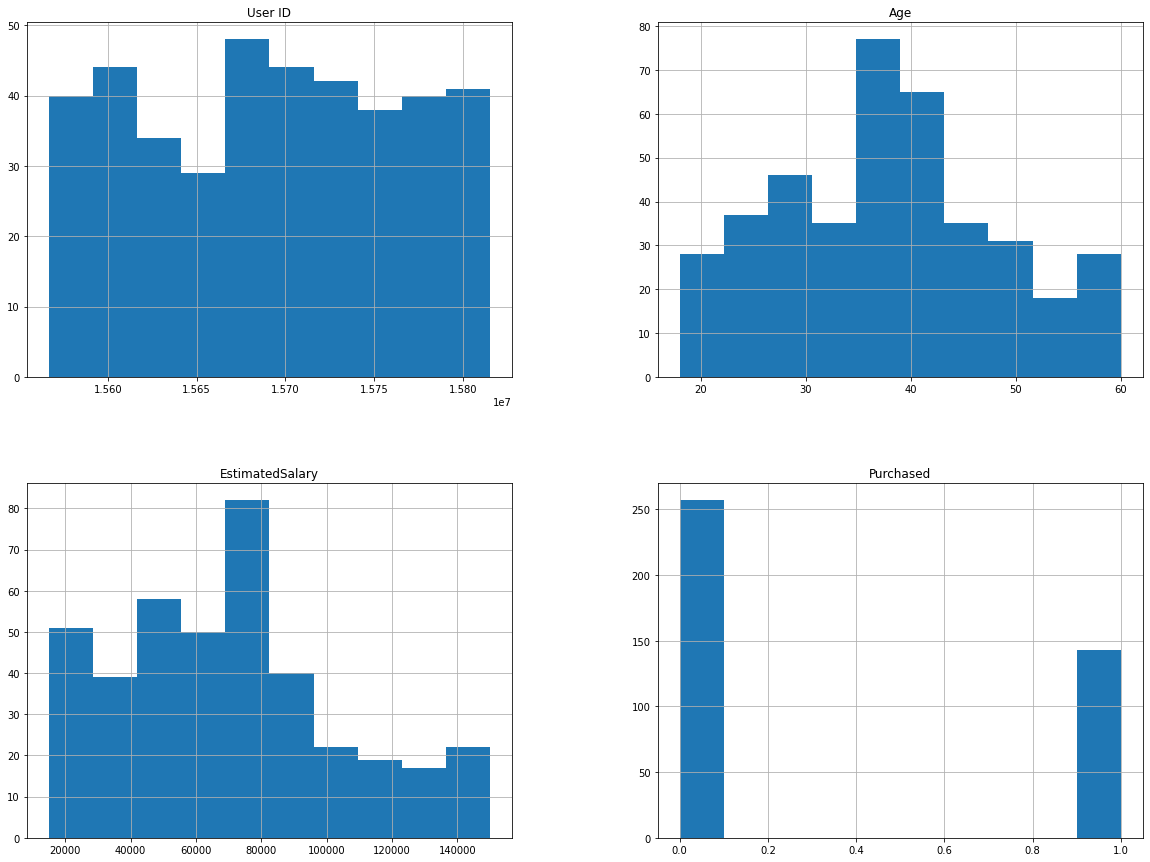

In [ ]:
dgraph = data.select_dtypes(include = ['int'])
dgraph.hist(figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'BOX PLOT OF User')

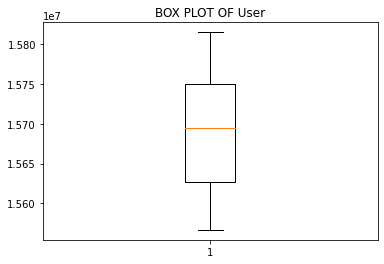

In [ ]:

 #Qutliers in beer_servings column
plt.boxplot(data['User ID'])
plt.title('BOX PLOT OF User')
 

Text(0.5, 1.0, 'BOX PLOT OF Age')

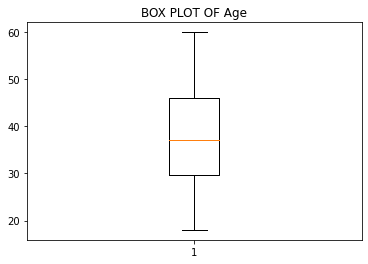

In [ ]:

#Qutliers in age  column
plt.boxplot(data['Age'])
plt.title('BOX PLOT OF Age')
 

Text(0.5, 1.0, 'BOX PLOT OF EstimatedSalary ')

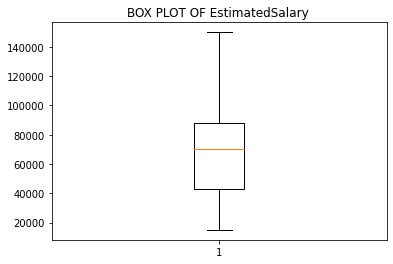

In [ ]:

#Qutliers in EstimatedSalary  column
plt.boxplot(data['EstimatedSalary'])
plt.title('BOX PLOT OF EstimatedSalary ')
 

Text(0.5, 1.0, 'BOX PLOT OF Purchased')

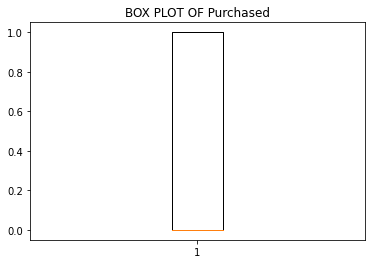

In [ ]:

#Qutliers in Purchased    column
plt.boxplot(data['Purchased'])
plt.title('BOX PLOT OF Purchased')
 

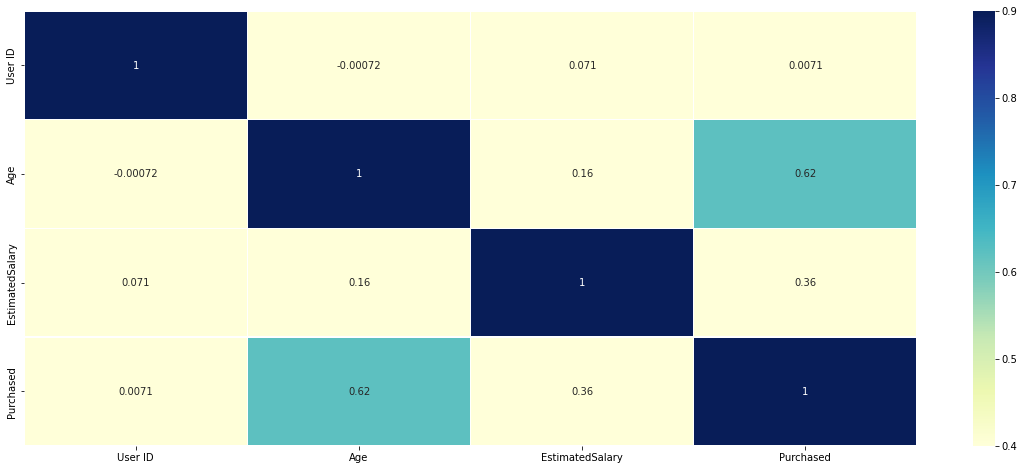

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
data.Gender.nunique()

2

In [ ]:
data=pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
#split the dataset and create the model
y=data['Purchased']
x=data.drop('Purchased', axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction= model.predict(x_test)
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))
#r2 ede value
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))


MSE IS: 0.09949629077064245
R squared value is : 0.5626536669422311


In [ ]:

x.describe()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(x)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.191092e-15,-2.331468e-16,-1.193490e-17,-9.103829e-17,9.103829e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.744488e+00,-1.877311e+00,-1.607506e+00,-1.020204e+00,-9.801961e-01
25%,-9.050886e-01,-7.550313e-01,-7.852897e-01,-1.020204e+00,-9.801961e-01
50%,3.914760e-02,-6.256110e-02,7.561451e-03,9.801961e-01,-9.801961e-01
75%,8.219131e-01,7.970571e-01,5.361289e-01,9.801961e-01,1.020204e+00
max,1.728357e+00,2.134241e+00,2.356750e+00,9.801961e-01,1.020204e+00


In [ ]:
x=data.drop(['User ID'],axis=1) 

In [ ]:
x.describe()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000,0.490000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


In [ ]:
#min-max scaling
# we change the feature set x by standard scaling. again take x from the dataset
X=data.drop('User ID', axis=1)
X.describe()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000,0.490000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


In [ ]:
#again create a linear regression model
#again create a linear regression model
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))



MSE IS: 1.5576470886987528e-28
R squared value is: 1.0


In [ ]:
X=pd.DataFrame(X)
X.describe()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [ ]:
#NORMALIZATION
#normalization is also done in the feature set. so again load the feature set x
X=data.drop('User ID', axis=1)
X.describe()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000,0.490000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


In [ ]:
X = preprocessing.normalize(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,0.000715,9.999996e-01,0.000006,0.000010,0.000010
std,0.000482,5.454322e-07,0.000011,0.000013,0.000014
min,0.000196,9.999968e-01,0.000000,0.000000,0.000000
25%,0.000376,9.999997e-01,0.000000,0.000000,0.000000
50%,0.000556,9.999998e-01,0.000000,0.000007,0.000000
75%,0.000807,9.999999e-01,0.000009,0.000015,0.000014
max,0.002522,1.000000e+00,0.000050,0.000067,0.000067


In [ ]:
# craete a linear regression model
#again create a linear regression model
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))
#we get negative value in r2ed value. so the normalization is not good for this dataset.
#it is good to be use in classification algorithm

MSE IS: 0.06756848263367175
R squared value is: 0.7029956807311132


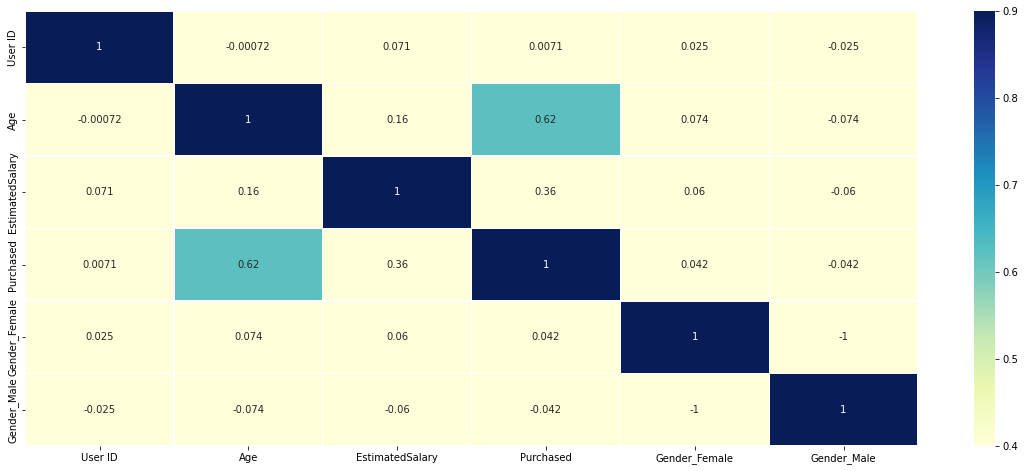

In [ ]:
from IPython.core.pylabtools import figsize
# feature reduction
# and check the model is improving
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')
